**importing the dependencies**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

**data collection**

In [51]:
df=pd.read_csv("car data.csv")

**EDA**

In [52]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
df.shape

(301, 9)

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [55]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [56]:
continous=["Selling_Price","Present_Price","Kms_Driven"]
discrete =["Year"]
categorical=["Fuel_Type","Seller_Type","Transmission","Owner"]

In [57]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [58]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [59]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [60]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Outlier**

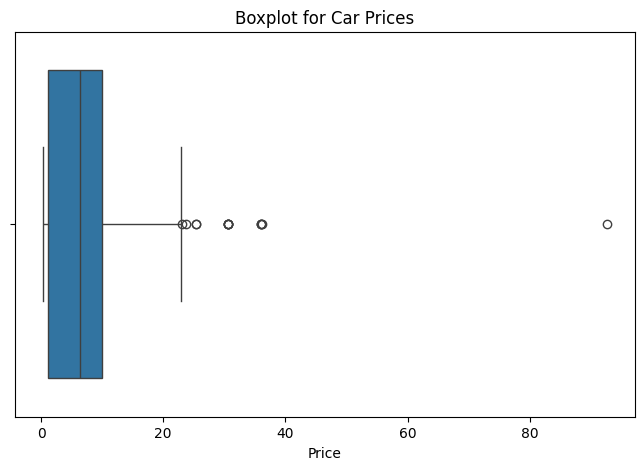

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Present_Price'])
plt.title('Boxplot for Car Prices')
plt.xlabel('Price')
plt.show()

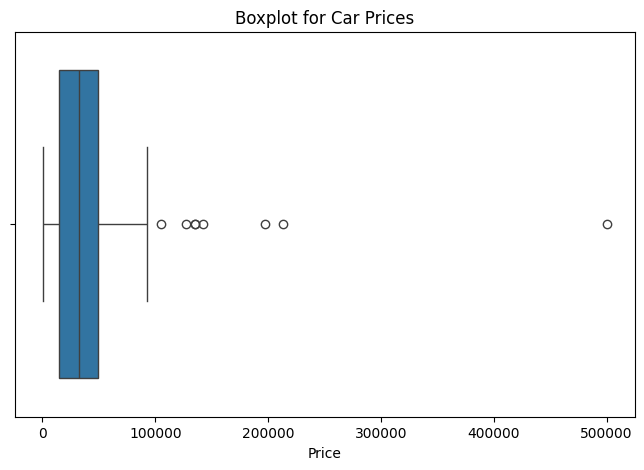

In [62]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Kms_Driven"])
plt.title('Boxplot for Car Prices')
plt.xlabel('Price')
plt.show()

**skewness**

In [63]:
df[continous].skew()

Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
dtype: float64

In [64]:
df["Kms_Driven"] = np.log1p(df["Kms_Driven"]) 
df["Present_Price"] = np.log1p(df["Present_Price"]) 
#df["Selling_Price"] = np.log1p(df["Selling_Price"]) 
df[continous].skew()

Selling_Price    2.493422
Present_Price   -0.047387
Kms_Driven      -1.048906
dtype: float64

In [65]:
from sklearn.preprocessing import PowerTransformer 
pt = PowerTransformer(method='yeo-johnson') 
df['Kms_Driven'] = pt.fit_transform(df[['Kms_Driven']]) 

In [66]:
df[continous].skew()

Selling_Price    2.493422
Present_Price   -0.047387
Kms_Driven       0.061064
dtype: float64

**encoding the categorical data**

In [67]:
df .replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df .replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
df .replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

* future engineering

In [68]:
current_year = pd.Timestamp.now().year
df['Car_Age'] = current_year - df['Year']
df.drop(columns=['Year'], inplace=True)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,1.885553,-0.049330,0,0,0,0,10
1,sx4,4.75,2.355178,0.497374,1,0,0,0,11
2,ciaz,7.25,2.384165,-1.298722,0,0,0,0,7
3,wagon r,2.85,1.638997,-1.500169,0,0,0,0,13
4,swift,4.60,2.063058,0.481332,1,0,0,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,2.533697,0.212641,1,0,0,0,8
297,brio,4.00,1.931521,0.931596,0,0,0,0,9
298,city,3.35,2.484907,1.476939,0,0,0,0,15
299,city,11.50,2.602690,-1.092790,1,0,0,0,7


In [69]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,1.885553,-0.049330,0,0,0,0,10
1,sx4,4.75,2.355178,0.497374,1,0,0,0,11
2,ciaz,7.25,2.384165,-1.298722,0,0,0,0,7
3,wagon r,2.85,1.638997,-1.500169,0,0,0,0,13
4,swift,4.60,2.063058,0.481332,1,0,0,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,2.533697,0.212641,1,0,0,0,8
297,brio,4.00,1.931521,0.931596,0,0,0,0,9
298,city,3.35,2.484907,1.476939,0,0,0,0,15
299,city,11.50,2.602690,-1.092790,1,0,0,0,7


In [70]:
X=df.drop(["Car_Name","Selling_Price"],axis=1)
Y=df["Selling_Price"]


In [71]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,1.885553,-0.049330,0,0,0,0,10
1,2.355178,0.497374,1,0,0,0,11
2,2.384165,-1.298722,0,0,0,0,7
3,1.638997,-1.500169,0,0,0,0,13
4,2.063058,0.481332,1,0,0,0,10
...,...,...,...,...,...,...,...
296,2.533697,0.212641,1,0,0,0,8
297,1.931521,0.931596,0,0,0,0,9
298,2.484907,1.476939,0,0,0,0,15
299,2.602690,-1.092790,1,0,0,0,7


In [72]:
Y


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

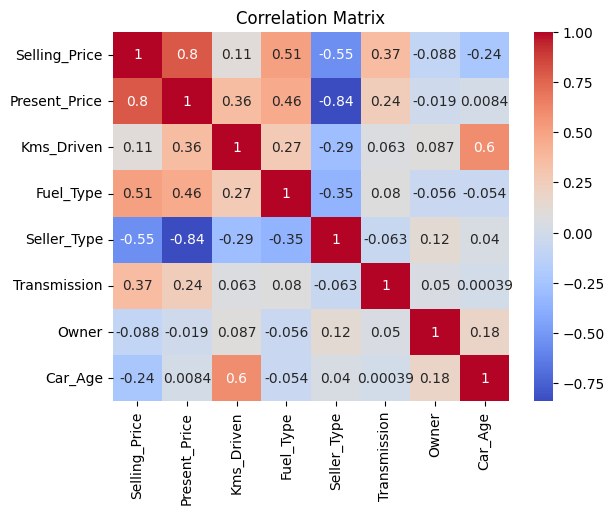

In [73]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and plot the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**splitting train and test data**

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=2)

**1.linear regression model**

In [75]:
model=LinearRegression()

In [76]:
model.fit(X_train,Y_train)

LinearRegression()

* prediction on train data

In [77]:
#prediction on train data
train_data_prediction=model.predict(X_train)


* errors in train data

In [78]:
#r squared error
error_score=metrics.r2_score(Y_train,train_data_prediction)
error_score

0.7991061475911766

* prediction on test data

In [79]:
test_data_prediction=model.predict(X_test)


In [80]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
error_score

0.7574611248252101

In [81]:
from joblib import dump
dump(model,"cars_model1.joblib")


['cars_model1.joblib']

**2.polynomial regression**

* transform and modeling on the train data

In [82]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(X_train))
x_train_poly.shape

(240, 35)

In [83]:
model2=LinearRegression()
model2.fit(x_train_poly,Y_train)

LinearRegression()

*predict on train data*

In [84]:
ypread_train=model2.predict(x_train_poly)

train_error_score=metrics.r2_score(Y_train,ypread_train)

print(train_error_score)

0.9767652186315732


*transform and predict on test data*

In [85]:
x_test_poly=pd.DataFrame(polynomial_converter.fit_transform(X_test))

ypread_test=model2.predict(x_test_poly)

test_error_score=metrics.r2_score(Y_test,ypread_test)

print( test_error_score)

0.9521562438590161


In [86]:
#in polynomial regression we have to try with different degrees (ex:-2,3)


In [87]:
from joblib import dump
dump(model2,"cars_model.joblib")


['cars_model.joblib']

**3.Lasso regression**

In [88]:
model3=Lasso(alpha=0.01)

In [89]:
model3.fit(X_train,Y_train)

Lasso(alpha=0.01)

* predict on train data

In [90]:
ypread_train3=model3.predict(X_train)
train_error_score3=metrics.r2_score(Y_train,ypread_train3)
print(train_error_score3)


0.7988707040373173


* predict on test data

In [91]:
ypread_test3=model3.predict(X_test)
test_error_score3=metrics.r2_score(Y_test,ypread_test3)
print(test_error_score3)

0.7645788907786062


**4.ridge regression**

In [92]:
model4=Ridge(alpha=0.1)
model4.fit(X_train,Y_train)

Ridge(alpha=0.1)

* predict on train data

In [93]:
ypread_train4=model4.predict(X_train)
train_error_score4=metrics.r2_score(Y_train,ypread_train4)
print(train_error_score4)


0.7991000359858439


* predict on test data

In [94]:
ypread_test4=model4.predict(X_test)
test_error_score4=metrics.r2_score(Y_test,ypread_test4)
print(test_error_score4)

0.7584492299070282


**5.ElasticNet regression**

In [95]:
from sklearn.linear_model import ElasticNet

model5 = ElasticNet(alpha=0.01, l1_ratio=0.7)
model5.fit(X_train, Y_train)

ElasticNet(alpha=0.01, l1_ratio=0.7)

* predict on train data

In [96]:
ypread_train5 = model5.predict(X_train)

train_error_score5=metrics.r2_score(Y_train,ypread_train5)

print(train_error_score5)

0.7984036917690007


* predict on test data

In [97]:
ypread_test5=model5.predict(X_test)
test_error_score5=metrics.r2_score(Y_test,ypread_test5)
print(test_error_score5)

0.7683918563775327
